In [1]:
#!pip install  nbconvert[webpdf]
import nbconvert
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [61]:
import pandas as pd
excel_file = "PH_Data2.xlsx"  # Replace with the actual file path
sheet_name = "Data"
import matplotlib.pyplot as plt
# Read the data from the specified sheet into a DataFrame
df = pd.read_excel(excel_file, sheet_name=sheet_name)
df = df.fillna(method='ffill')

#print(df.head())
print(len(df1))
date = df['Date']
print(df.columns)


72
Index(['Date', 'RGDP_sa', 'RINV_sa', 'RGCE_sa', 'RGovExp_sa', 'Rlend_sa',
       'REER_sa', 'Rrate', 'RNXG_sa', 'RNX_sa', 'RCAB_sa', 'RNXG_RGDP',
       'RNX_RGDP', 'RCAB_RGDP', 'RFFFund_1', 'RFFFund_2', 'RUSFFund',
       'FCPIsa_1', 'FCPIsa_2', 'Wcomm_sa', 'FGDPsa_1', 'FGDPsa_2', 'PGDP_sa',
       'CPI_sa', 'inflation', 'Rexpgd_sa', 'Rexp_sa', 'RCAcredit_sa', 'rate',
       'FFFund_1', 'FFFund_2', 'USFFund', 'Ginflation1', 'Ginflation2',
       'Wcomm_inflation', 'ExRet', 'CDS', 'RGCE_GDP', 'RGovExp_GDP',
       'GovBal_GDP', 'Debt_GDP', 'Stock_index', 'Rstock_index',
       'Rstock_index_cpi', 'RPCE_sa'],
      dtype='object')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


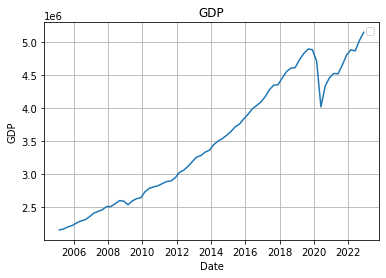

In [78]:
GDP = df['RGDP_sa']
GDP = np.array(GDP)
Inflation = df['inflation']
Inflation = np.array(Inflation)
plt.plot(date, GDP)
Rate = df['rate']
Rate = np.array(Rate)
WinfC = df['Wcomm_inflation']
WinfC = np.array(WinfC)
ExRet= df['ExRet']
ExRet  = np.array(ExRet)
plt.title('GDP')
plt.xlabel('Date')
plt.ylabel('GDP')
plt.legend()
plt.grid(True)
plt.show()

In [79]:
ygrowth = np.log(GDP[5:]) - np.log(GDP[:-5])



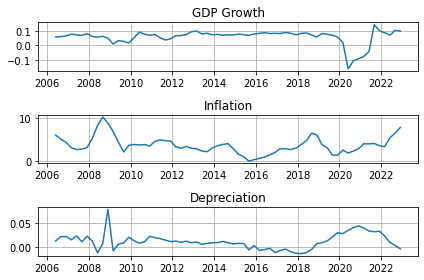

In [81]:
import matplotlib.pyplot as plt

# Create the first subplot (top)
plt.subplot(3, 1, 1)  # 2 rows, 1 column, first subplot
plt.plot(date[5:], ygrowth)
plt.title('GDP Growth')  # Add a title if desired
plt.grid(True)  # Add grid to the first subplot
plt.axis('tight')  # Set axis limits to the data range


# Create the second subplot (bottom)
plt.subplot(3, 1, 2)  # 2 rows, 1 column, second subplot
plt.plot(date[5:], Inflation[5:])
plt.title('Inflation')  # Add a title if desired
plt.grid(True)  # Add grid to the first subplot
plt.axis('tight')  # Set axis limits to the data range

plt.subplot(3, 1,3)  # 2 rows, 1 column, second subplot
plt.plot(date[5:], ExRet[5:])
plt.title('Depreciation')  # Add a title if desired
plt.grid(True)  # Add grid to the first subplot
plt.axis('tight')  # Set axis limits to the data range



# Adjust the layout to avoid overlap
plt.tight_layout()

plt.show()


67

In [76]:
ExRate

array([ 0.02062691,  0.02127725,  0.01426729,  0.01449466,  0.01719765,
        0.01233473,  0.02171694,  0.02159092,  0.01497815,  0.02304077,
        0.01075947,  0.02251925,  0.01236477, -0.01190838,  0.00693912,
        0.07774969, -0.00790958,  0.00570034,  0.00828586,  0.020147  ,
        0.01311473,  0.00774719,  0.01088883,  0.02212855,  0.01915999,
        0.01732646,  0.0142194 ,  0.01119351,  0.01217774,  0.00969615,
        0.01202657,  0.00879922,  0.01009289,  0.00549854,  0.00727832,
        0.00877324,  0.00896743,  0.01144881,  0.0089773 ,  0.00639133,
        0.00750089,  0.00718327, -0.00616584,  0.00307857, -0.00715972,
       -0.00529102, -0.00270034, -0.01175197, -0.0073889 , -0.00432313,
       -0.00989009, -0.0129681 , -0.01367915, -0.01160912, -0.00505032,
        0.00694272,  0.00896376,  0.01253545,  0.02091081,  0.02958715,
        0.02753102,  0.03457198,  0.03988497,  0.04356562,  0.03938509,
        0.03275664,  0.03164953,  0.03237537,  0.02249116,  0.00

In [77]:
plt.plot(date, ExRet)

NameError: name 'ExRet' is not defined